# **Deep Learning Capstone Project: Facial Emotion Recognition**

---

## **Context**

---

Deep Learning has found applications in many predictive tasks relating to more unstructured forms of data over the last few years, such as images, text, audio and video. Many of these tasks seem to be in the vein of a larger direction of predictive modeling that aims to match human-level performance on such tasks, because humans have evolved to specialize in performing intelligent actions on such unstructured data. As a specific branch of AI (also called Affective Computing or Emotion AI) Artificial Emotional Intelligence stands for the study and development of technologies and computers that can read human emotions by means of analyzing body gestures, facial expressions, voice tone, etc. and react appropriately to them.

In the field of human-machine interaction, facial expression recognition is critical. From recent research, it has been found that as much as 55% of communication of sentiment takes place
through facial expressions and other visual cues. Therefore, training a model to identify facial
emotions accurately is an important step towards the development of emotionally intelligent behavior in machines with AI capabilities. Automatic facial expression recognition systems could have many applications, including but not limited to any use case that requires human behavior understanding, detection of mental disorders, and creating a higher quality of virtual assistant for customer-facing businesses.

---

## **Objective**

---

The goal of this project is to use Deep Learning and Artificial Intelligence techniques to create a computer vision model that can accurately detect facial emotions. The model should be able to perform multi-class classification on images of facial expressions, to classify the expressions according to the associated emotion.

---

## **About the dataset**

---

The data set consists of 3 folders, i.e., **'test'**, **'train'**, and **'validation'**.

Each of these folders has four subfolders:

- **‘happy’**: Images of people who have happy facial expressions.
- **‘sad’**: Images of people with sad or upset facial expressions.
- **‘surprise’**: Images of people who have shocked or surprised facial expressions.
- **‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.


## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.


In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile
import random
from PIL import Image
from typing import List
from datetime import datetime

# For Data Visualization
import cv2
import seaborn as sns

# For Model Building
import tensorflow as tf
import keras

# Sequential API for sequential model
from tensorflow.keras.models import Sequential, Model

# Importing different layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU, Activation
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical  # To perform one-hot encoding

# Optimizers for optimizing the model
from tensorflow.keras.optimizers import RMSprop, Adam, SGD

# Regularization method to prevent the overfitting
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import losses, optimizers
from tensorflow.keras.preprocessing.image import load_img
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

2024-03-16 11:27:18.598802: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-16 11:27:18.598823: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-16 11:27:18.599322: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-16 11:27:18.602593: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-16 11:27:19.130108: W tensorflow/compiler/tf2

**Let us check the version of tensorflow.**


In [2]:
print(tf.__version__)

2.15.0


In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices("GPU")))

Num GPUs Available:  1


2024-03-16 10:42:40.188896: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-16 10:42:40.211183: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-16 10:42:40.211396: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

## **Load the dataset**


In [4]:
# Storing the path of the data file from the Google drive
# path = "/content/drive/MyDrive/Studies/MIT-AI-ML/11. Capstone Project/Facial_emotion_images.zip"
# path = "/home/iamtxena/sandbox/mit-ai/capstone/Facial Emotion Recognition/Facial_emotion_images.zip"

# # The data is provided as a zip file so we need to extract the files from the zip file
# with zipfile.ZipFile(path, "r") as zip_ref:
#     zip_ref.extractall()

## **Preparing the Data**

The dataset has three folders, i.e., 'train', 'validation' and 'test'. Each of these folders has four sub-folders, namely 'happy', 'neutral', 'sad', and 'surprise'. We will have the train and test path stored in a variable named 'SUBDIRS', and a base directory 'DATADIR'. The names of the sub-folders, which will be the classes for our classification task will be stored in an array called 'CATEGORIES'.


In [2]:
# DATADIR = "/content/Facial_emotion_images"  # Base directory
DATADIR = "/home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/Facial_emotion_images"
SUBDIRS = ["train", "validation", "test"]  # Subdirectories
CATEGORIES = ["happy", "neutral", "sad", "surprise"]  # Emotion categories

We are going to check the size of one image, and then check if all the other images have the same size. In case, they are different, we'll resize the ones that are different.


In [8]:
def get_first_image_size(directory, sub_dirs, categories):
    """
    Returns the size of the first image found in the specified directories.

    Parameters:
    - directory (str): The base directory of the dataset.
    - sub_dirs (list of str): Subdirectories to search through (e.g., ['train', 'validation', 'test']).
    - categories (list of str): Categories (e.g., ['happy', 'neutral', 'sad', 'surprise']).

    Returns:
    - tuple: Size of the first image found (width, height).
    """
    for sub_dir in sub_dirs:
        for category in categories:
            path = os.path.join(directory, sub_dir, category)
            for img_name in os.listdir(path):
                img_path = os.path.join(path, img_name)
                with Image.open(img_path) as img:
                    return img.size  # Return the size of the first image found

In [9]:
# Get the size of the first image
expected_size = get_first_image_size(DATADIR, SUBDIRS, CATEGORIES)

print(f"Expected size of the first image: {expected_size}")

Expected size of the first image: (48, 48)


In [10]:
def check_image_sizes(directory, sub_dirs, categories, target_size):
    """
    Checks if all images in the specified directories match the target size.

    Parameters:
    - directory (str): The base directory of the dataset.
    - sub_dirs (list of str): Subdirectories to search through.
    - categories (list of str): Categories to search through.
    - target_size (tuple): The expected size of the images (width, height).

    Returns:
    - bool: True if all images match the target size, False otherwise.
    """
    all_match = True  # Flag to keep track of size match

    for sub_dir in sub_dirs:
        for category in categories:
            path = os.path.join(directory, sub_dir, category)
            for img_name in os.listdir(path):
                img_path = os.path.join(path, img_name)
                with Image.open(img_path) as img:
                    if img.size != target_size:
                        print(f"Image {img_path} has a different size: {img.size}, expected: {target_size}")
                        all_match = False
                        return all_match  # Return early upon first mismatch
    return all_match

In [11]:
# Check if all images match the expected size
all_match = check_image_sizes(DATADIR, SUBDIRS, CATEGORIES, expected_size)
if all_match:
    print("All images match the expected size.")
else:
    print("Not all images match the expected size.")

All images match the expected size.


## **Visualizing images randomly from each class**


In [12]:
def visualize_emotion_images(directory: str, sub_dirs: List[str], emotion: str, image_count: int = 9) -> None:
    """
    Visualizes a specified number of images from a given emotion class directory across specified subdirectories.

    Parameters:
    - directory (str): The base directory where emotion class folders are located across subdirectories.
    - sub_dirs (List[str]): List of subdirectories ('train', 'validation', 'test') to search through.
    - emotion (str): The specific emotion class to visualize images from.
    - image_count (int): The number of images to display. Defaults to 9.

    Returns:
    - None: This function does not return any value but displays images inline.
    """
    image_paths: List[str] = []  # To store paths of images to be displayed

    # Iterate through the specified subdirectories to collect image paths
    for sub_dir in sub_dirs:
        emotion_dir: str = os.path.join(directory, sub_dir, emotion)
        if os.path.isdir(emotion_dir):
            for img_name in os.listdir(emotion_dir):
                img_path = os.path.join(emotion_dir, img_name)
                image_paths.append(img_path)

    # If there are no images found for the emotion, print a message and return
    if not image_paths:
        print(f"No images found for the specified emotion: {emotion}")
        return

    # Select a random subset of image paths
    selected_image_paths: np.ndarray = np.random.choice(image_paths, min(image_count, len(image_paths)), replace=False)

    # Setup for plotting
    fig = plt.figure(figsize=(4, 4))
    columns: int = 3
    rows: int = image_count // columns + (1 if image_count % columns else 0)

    # Iterate over the selected images and display them
    for i, image_path in enumerate(selected_image_paths, start=1):
        ax = fig.add_subplot(rows, columns, i)
        # Ensure the image is resized to 48x48
        image = load_img(image_path, target_size=(48, 48))
        plt.imshow(image)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

---
### **Happy**
---


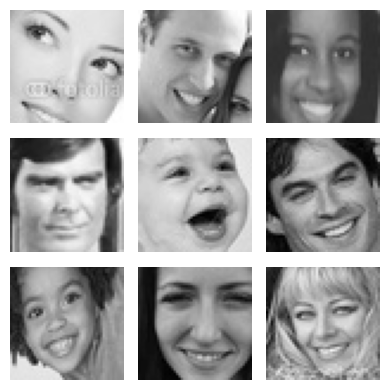

In [13]:
visualize_emotion_images(DATADIR, SUBDIRS, "happy", 9)

**Observations:**

- The images appear to be in grayscale and vary in terms of lighting, contrast, and clarity.

- The images display a range of happy expressions, from broad smiles showing teeth to subtle smiles without teeth. Also a diversity of subjects in terms of age, gender and also ethnicity.


---
### **Sad**
---


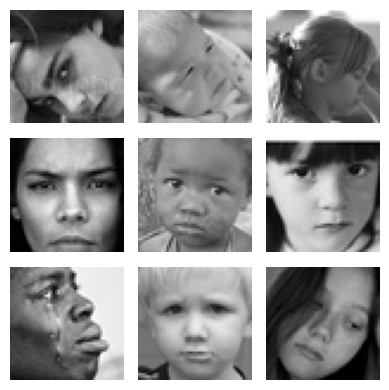

In [14]:
visualize_emotion_images(DATADIR, SUBDIRS, "sad", 9)

**Observations:**

- The images capture a wide spectrum of sadness, from subtle, somber expressions to more overt manifestations like crying.
- The dataset includes faces with different orientations and features. Some faces are directly looking at the camera, while others are tilted or partially turned away.


---
### **Surprise**
---


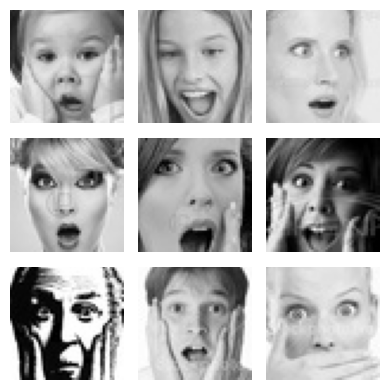

In [15]:
visualize_emotion_images(DATADIR, SUBDIRS, "surprise", 9)

**Observations:**

- The images showcase a range of intensities of surprise, from wide-eyed and open-mouthed expressions to more subdued, raised-eyebrow looks.
- The subjects vary in age, including both infants and adults.


---
### **Neutral**
---


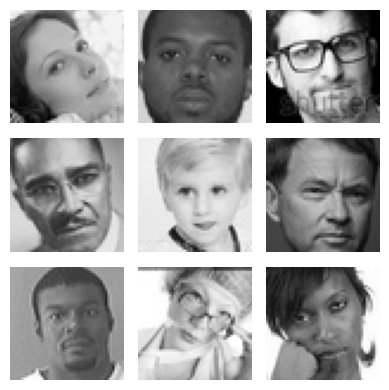

In [16]:
visualize_emotion_images(DATADIR, SUBDIRS, "neutral", 9)

**Observations:**

- The defining characteristic of these images is the absence of clear, expressive features that denote a specific emotion.
- Some faces may have subtle features that could be misconstrued as expressing a mild emotion.


### **Data Preprocessing**

In the following cells, we will shuffle our training and testing_data, and store the images in X_train, and X_test, and the labels in y_train, and y_test respectively.


In [18]:
# Function to load images and labels
def load_data(data_dir, categories):
    images = []
    labels = []
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img_name in os.listdir(path):
            try:
                img_path = os.path.join(path, img_name)
                img = Image.open(img_path)
                images.append(np.array(img))
                labels.append(class_num)
            except Exception as e:
                print(f"Failed to process {img_name}: {e}")
    return images, labels

In [19]:
SUBDIRS_DICT = {"train": "train", "validation": "validation", "test": "test"}

In [20]:
# Load training, validation and testing data
X_train, y_train = load_data(os.path.join(DATADIR, SUBDIRS_DICT["train"]), CATEGORIES)
X_validation, y_validation = load_data(os.path.join(DATADIR, SUBDIRS_DICT["validation"]), CATEGORIES)
X_test, y_test = load_data(os.path.join(DATADIR, SUBDIRS_DICT["test"]), CATEGORIES)

# Convert lists to numpy arrays and add an extra dimension for grayscale channel
X_train = np.expand_dims(np.array(X_train), axis=-1)
X_validation = np.expand_dims(np.array(X_validation), axis=-1)
X_test = np.expand_dims(np.array(X_test), axis=-1)
y_train = np.array(y_train)
y_validation = np.array(y_validation)
y_test = np.array(y_test)

# Shuffle the training data
indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)
X_train = X_train[indices]
y_train = y_train[indices]

# Shuffle the validation data
indices = np.arange(X_validation.shape[0])
np.random.shuffle(indices)
X_validation = X_validation[indices]
y_validation = y_validation[indices]


# Shuffle the testing data
indices = np.arange(X_test.shape[0])
np.random.shuffle(indices)
X_test = X_test[indices]
y_test = y_test[indices]

# Check the shape of the data
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_validation shape: {X_validation.shape}")
print(f"y_validation shape: {y_validation.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (15109, 48, 48, 1)
y_train shape: (15109,)
X_validation shape: (4977, 48, 48, 1)
y_validation shape: (4977,)
X_test shape: (128, 48, 48, 1)
y_test shape: (128,)


## **Checking Distribution of Classes**


In [21]:
# Create a mapping from indices to emotion classes
index_to_emotion = {i: emotion for i, emotion in enumerate(CATEGORIES)}

# Convert the y_train, y_validation, and y_test lists to DataFrames
y_train_df = pd.DataFrame(y_train, columns=["Label"])
y_validation_df = pd.DataFrame(y_validation, columns=["Label"])
y_test_df = pd.DataFrame(y_test, columns=["Label"])

# Map the numerical labels to actual emotion classes
y_train_df["Label"] = y_train_df["Label"].map(index_to_emotion)
y_validation_df["Label"] = y_validation_df["Label"].map(index_to_emotion)
y_test_df["Label"] = y_test_df["Label"].map(index_to_emotion)

# Printing the value counts of target variable with actual emotion classes
print("TRAINING DATA")
count = y_train_df["Label"].value_counts()
print(count)

print("*" * 10)

# Normalized value counts
count_normalized = y_train_df["Label"].value_counts(normalize=True)
print(count_normalized)

# Printing the value counts of target variable with actual emotion classes
print("\n\nVALIDATION DATA")
count = y_validation_df["Label"].value_counts()
print(count)

print("*" * 10)

# Normalized value counts
count_normalized = y_validation_df["Label"].value_counts(normalize=True)
print(count_normalized)

# Printing the value counts of target variable with actual emotion classes
print("\n\nTEST DATA")
count = y_test_df["Label"].value_counts()
print(count)

print("*" * 10)

# Normalized value counts
count_normalized = y_test_df["Label"].value_counts(normalize=True)
print(count_normalized)

TRAINING DATA
Label
sad         3982
neutral     3978
happy       3976
surprise    3173
Name: count, dtype: int64
**********
Label
sad         0.263552
neutral     0.263287
happy       0.263154
surprise    0.210007
Name: proportion, dtype: float64


VALIDATION DATA
Label
happy       1825
neutral     1216
sad         1139
surprise     797
Name: count, dtype: int64
**********
Label
happy       0.366687
neutral     0.244324
sad         0.228853
surprise    0.160137
Name: proportion, dtype: float64


TEST DATA
Label
neutral     32
happy       32
sad         32
surprise    32
Name: count, dtype: int64
**********
Label
neutral     0.25
happy       0.25
sad         0.25
surprise    0.25
Name: proportion, dtype: float64


**Observation:**

- The dataset shows a near-uniform distribution for 'sad', 'neutral', and 'happy' classes, suggesting a balanced dataset.


## **Normalizing the data**


In [23]:
# Normalizing the image data
X_train = X_train / 255.0
X_validation = X_validation / 255.0
X_test = X_test / 255.0

## **Encoding Target Variable**

For any ML or DL techniques, the labels must be encoded into numbers or arrays, so that we can compute the cost between the predicted and the real labels.

In our scenario, we have four classes: "Happy", "Neutral", "Sad", and "Surprise". The labels for these classes would be encoded as follows:

- [1, 0, 0, 0] --------- Happy
- [0, 1, 0, 0] --------- Neutral
- [0, 0, 1, 0] --------- Sad
- [0, 0, 0, 1] --------- Surprise

Here, each emotion class is represented as a one-hot encoded array, which is a common format for categorical encoding in ML and DL tasks.


In [27]:
# One-hot encode the 'Label' column using pandas get_dummies
y_train_encoded = pd.get_dummies(y_train_df["Label"])
y_validation_encoded = pd.get_dummies(y_validation_df["Label"])
y_test_encoded = pd.get_dummies(y_test_df["Label"])

y_train_encoded = y_train_encoded.astype(int)
y_validation_encoded = y_validation_encoded.astype(int)
y_test_encoded = y_test_encoded.astype(int)

In [28]:
train_index_to_check = 0
validation_index_to_check = 0
test_index_to_check = 0

# Print the original label and the one-hot encoded vector from the train set
print(f"Original train label: {y_train_df.iloc[train_index_to_check]['Label']}")
print("One-hot encoded train vector:", y_train_encoded.iloc[train_index_to_check].tolist())

# Print the original label and the one-hot encoded vector from the validation set
print(f"\nOriginal validation label: {y_validation_df.iloc[validation_index_to_check]['Label']}")
print("One-hot encoded validation vector:", y_validation_encoded.iloc[validation_index_to_check].tolist())

# Print the original label and the one-hot encoded vector from the test set
print(f"\nOriginal test label: {y_test_df.iloc[test_index_to_check]['Label']}")
print("One-hot encoded test vector:", y_test_encoded.iloc[test_index_to_check].tolist())

Original train label: sad
One-hot encoded train vector: [0, 0, 1, 0]

Original validation label: neutral
One-hot encoded validation vector: [0, 1, 0, 0]

Original test label: happy
One-hot encoded test vector: [1, 0, 0, 0]


## **Model Building**

Now that we have done data preprocessing, let's build the first Convolutional Neural Network (CNN) model.


### **Model 1 Architecture:**

- The first CNN Model will have three convolutional blocks.
- Each convolutional block will have a Conv2D layer and a MaxPooling2D Layer.
- Add first Conv2D layer with **64 filters** and a **kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (48, 48, 1)**. Use **'relu' activation**.
- Add MaxPooling2D layer with **kernel size 3x3** and use **padding = 'same'**.
- Add a second Conv2D layer with **32 filters** and **a kernel size of 3x3**. Use the **'same' padding** and **'relu activation**.
- Follow it up with another MaxPooling2D layer **kernel size 3x3** and use **padding = 'same'**.
- Add a third Conv2D layer with **32 filters and the kernel size of 3x3**. Use the **'same' padding** and **'relu activation**. Once again, follow it up with another Maxpooling2D layer with **kernel size 3x3** and **padding = 'same'**.
- Once the convolutional blocks are added, add the Flatten layer.
- Finally, add dense layers.
- Add first Dense layer with **100 neurons** and **'relu' activation**
- The last dense layer must have as many neurons as the number of classes, which in this case is 4 and use **'softmax' activation**.
- Initialize SGD optimizer with **learning rate = 0.01** and **momentum = 0.9**
- Compile your model using the optimizer you initialized and use **categorical_crossentropy** as the loss function and 'accuracy' as the metric
- Print the model summary and write down your observations/insights about the model.


In [29]:
import random

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [30]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3, padding 'same' provides the output size same as the input size
# The input_shape denotes input image dimension
model.add(Conv2D(64, (3, 3), activation="relu", padding="same", input_shape=(48, 48, 1)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding="same"))

# Adding second conv layer with 32 filters and kernel size 3x3, padding 'same' followed by a Maxpooling2D layer
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))

# Add third conv layer with 32 filters and kernel size 3x3, padding 'same' followed by a Maxpooling2D layer
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))

# Flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model.add(Dense(100, activation="relu"))

# Adding the output layer with 3 neurons and activation functions as softmax since this is a multi-class classification problem
model.add(Dense(4, activation="softmax"))

# Using SGD Optimizer
opt = SGD(learning_rate=0.01, momentum=0.9)

# Compiling the model
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 32)          0

2024-03-03 11:01:17.283119: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-03 11:01:17.283295: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-03 11:01:17.283417: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

**Observations:**

- As we can see from the above summary, this CNN model will train and learn **128,376 parameters (weights and biases).**
- There are **no non-trainable parameters** in the model.


### **Training the Model**

Let's now train the model using the training data.


In [31]:
# results_path = "/content/drive/MyDrive/Studies/MIT-AI-ML/11. Capstone Project/results"
results_path = "/home/iamtxena/sandbox/mit-ai/capstone/Facial Emotion Recognition/results"

In [32]:
# Get the current time
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")

# The following lines of code saves the best model's parameters if training accuracy goes down on further training
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=5)
mc = ModelCheckpoint(
    f"{results_path}/best_model_{current_time}.keras",
    monitor="val_accuracy",
    mode="max",
    verbose=1,
    save_best_only=True,
)

# Fitting the model with 30 epochs and using validation set
history = model.fit(
    X_train,
    y_train_encoded,
    epochs=30,
    batch_size=32,
    validation_data=(X_validation, y_validation_encoded),
    callbacks=[es, mc],
)

Epoch 1/30


2024-03-03 11:02:59.989691: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-03 11:03:00.240847: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f704135b010 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-03 11:03:00.240869: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
I0000 00:00:1709463780.280282  100786 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


473/473 [==============================] - ETA: 0s - loss: 1.3438 - accuracy: 0.3217
Epoch 1: val_accuracy improved from -inf to 0.43922, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial Emotion Recognition/results/best_model_20240303-110259.keras
473/473 [==============================] - 3s 4ms/step - loss: 1.3438 - accuracy: 0.3217 - val_loss: 1.2247 - val_accuracy: 0.4392
Epoch 2/30
461/473 [============================>.] - ETA: 0s - loss: 1.1791 - accuracy: 0.4772
Epoch 2: val_accuracy improved from 0.43922 to 0.55274, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial Emotion Recognition/results/best_model_20240303-110259.keras
473/473 [==============================] - 1s 3ms/step - loss: 1.1765 - accuracy: 0.4786 - val_loss: 1.0523 - val_accuracy: 0.5527
Epoch 3/30
451/473 [===========================>..] - ETA: 0s - loss: 1.0578 - accuracy: 0.5408
Epoch 3: val_accuracy improved from 0.55274 to 0.58248, saving model to /home/iamtxena/sandbox/mit-ai/caps

### **Plotting the Training and Validation Accuracies**


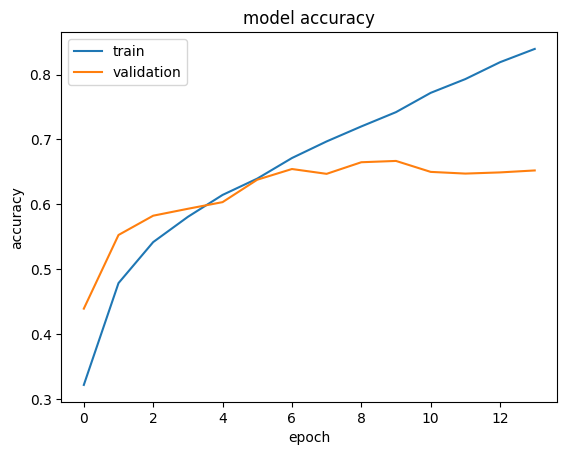

In [33]:
# Plotting the training and validation accuracies for each epoch

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

### **Checking Test Accuracy**


In [34]:
model.evaluate(X_test, (y_test_encoded))

4/4 [==============================] - 0s 2ms/step - loss: 1.0403 - accuracy: 0.6797


[1.0402710437774658, 0.6796875]

**Observations:**

- The training accuracy of the model increases consistently and reaches a high level (around 80%), while the validation accuracy remains significantly lower and does not improve much beyond the initial epochs (around 68%). The model **may be overfitting** to the training data and not generalizing well to unseen data.
- The training process stopped early, which indicates that the validation accuracy did not improve for a number of epochs defined in the early stopping criteria.


### **Plotting Confusion Matrix**


4/4 [==============================] - 0s 985us/step
              precision    recall  f1-score   support

       happy       0.76      0.81      0.79        32
     neutral       0.49      0.59      0.54        32
         sad       0.65      0.62      0.63        32
    surprise       0.92      0.69      0.79        32

    accuracy                           0.68       128
   macro avg       0.70      0.68      0.69       128
weighted avg       0.70      0.68      0.69       128



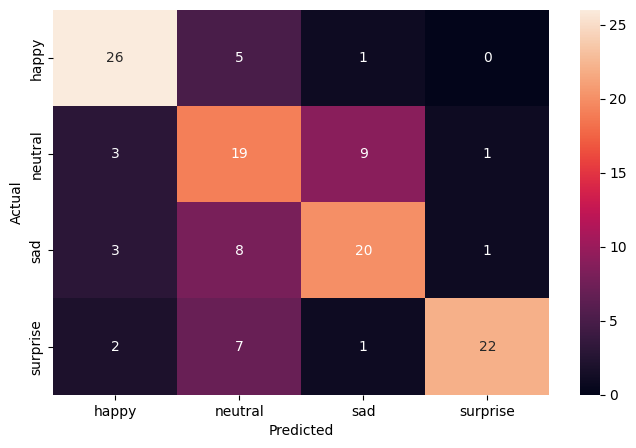

In [35]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)

# Convert the pandas DataFrame to a numpy array if it's not already
if isinstance(y_test_encoded, pd.DataFrame):
    y_test_encoded = y_test_encoded.values

# Now we can safely use np.argmax
y_true = np.argmax(y_test_encoded, axis=1)

# Printing the classification report with actual emotion labels
print(classification_report(y_true, pred, target_names=CATEGORIES))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**Observations:**

- The model predicts 'surprise' with high accuracy but struggles to correctly identify the other emotions.
- There's a notable imbalance in model performance across different emotions, with 'surprise' having the highest F1-score (0.90) and 'sad' the lowest (0.55), indicating inconsistency in predictive power.
- Overall accuracy is 68%, meaning the model correctly predicts the emotion for roughly two-thirds of the test samples, with room for improvement.


### **Model 2 Architecture:**

- We plan on having 4 convolutional blocks in this Architecture, each having a Conv2D, MaxPooling2D, and a Dropout layer.
- Adding first Conv2D layer with **256 filters** and a **kernel size of 5x5**. Using the **'same' padding** and provide the **input shape = (48, 48, 1)**. Using **'relu' activation**.
- Adding MaxPooling2D layer with **kernel size 5x5** and **stride size 2x2**.
- Adding a Dropout layer with a dropout ratio of **0.2**.
- Adding a second Conv2D layer with **128 filters** and a **kernel size of 5x5**. Using the **'same' padding** and **'relu' activation**.
- Following this up with a similar Maxpooling2D layer like above and a Dropout layer with 0.3 dropout ratio.
- Adding a third Conv2D layer with **64 filters** and a **kernel size of 5x5**. Using the **'same' padding** and **'relu' activation**.
- Following this up with a similar Maxpooling2D layer and a Dropout layer with dropout ratio of 0.3.
- Adding a fourth Conv2D layer with **32 filters** and a **kernel size of 3x3**. Using the **'same' padding** and **'relu' activation**.
- Following this up with a similar Maxpooling2D layer and a Dropout layer with dropout ratio of 0.3.
- Once the convolutional blocks are added, we add the Flatten layer.
- Adding first fully connected dense layer with 64 neurons and using **'relu' activation**.
- Adding a second fully connected dense layer with 32 neurons and using **'relu' activation**.
- Adding a final dense layer with 4 neurons and using **'softmax' activation function**.
- Initializing an **Adam optimizer** with a learning rate of 0.0005.
- Compiling your model with the optimizer initialized and using **categorical_crossentropy** as the loss function and the 'accuracy' as the metric.
- Finally, printing your model summary and writing down the observations.


In [36]:
import random

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [37]:
# Initializing a sequential model
model_2 = Sequential()

# Adding first conv layer
model_2.add(Conv2D(filters=256, kernel_size=(5, 5), padding="Same", input_shape=(48, 48, 1), activation="relu"))
model_2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_2.add(Dropout(0.2))

# Adding second conv layer
model_2.add(Conv2D(filters=128, kernel_size=(5, 5), padding="Same", activation="relu"))
model_2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_2.add(Dropout(0.3))

# Adding third conv layer
model_2.add(Conv2D(filters=64, kernel_size=(3, 3), padding="Same", activation="relu"))
model_2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_2.add(Dropout(0.3))

# Adding fourth conv layer
model_2.add(Conv2D(filters=32, kernel_size=(3, 3), padding="Same", activation="relu"))
model_2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_2.add(Dropout(0.3))

# Flattening
model_2.add(Flatten())
model_2.add(Dense(64, activation="relu"))
model_2.add(Dense(32, activation="relu"))

# Adding the output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
model_2.add(Dense(4, activation="softmax"))

# Using Adam Optimizer
optimizer = Adam(learning_rate=0.0005)

# Compile the model
model_2.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 256)       6656      
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 256)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       819328    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 128)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 128)       0

**Observations:**

- The model is relatively deep, with multiple convolutional layers followed by max pooling layers, indicating it is designed to capture complex features from the input images.
- A significant number of parameters are concentrated in the earlier convolutional layers, especially the second Conv2D layer (819,328 parameters),
  with a total of 938,948 trainable parameters, with 0 non-trainable ones.


### **Training the Model**

Let's now train the model using the training data.


In [38]:
# Get the current time
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")

# The following lines of code saves the best model's parameters if training accuracy goes down on further training
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=7)
mc = ModelCheckpoint(
    f"{results_path}/best_model_2_{current_time}.keras",
    monitor="val_accuracy",
    mode="max",
    verbose=1,
    save_best_only=True,
)

# Fitting the model_2 with 30 epochs and using validation set
history_2 = model_2.fit(
    X_train,
    y_train_encoded,
    epochs=30,
    batch_size=32,
    validation_data=(X_validation, y_validation_encoded),
    callbacks=[es, mc],
)

Epoch 1/30


2024-03-03 11:04:09.396313: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-03-03 11:04:10.049713: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


473/473 [==============================] - ETA: 0s - loss: 1.3829 - accuracy: 0.2635
Epoch 1: val_accuracy improved from -inf to 0.25537, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial Emotion Recognition/results/best_model_2_20240303-110408.keras
473/473 [==============================] - 9s 12ms/step - loss: 1.3829 - accuracy: 0.2635 - val_loss: 1.3739 - val_accuracy: 0.2554
Epoch 2/30
468/473 [============================>.] - ETA: 0s - loss: 1.3479 - accuracy: 0.3179
Epoch 2: val_accuracy improved from 0.25537 to 0.37312, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial Emotion Recognition/results/best_model_2_20240303-110408.keras
473/473 [==============================] - 5s 11ms/step - loss: 1.3471 - accuracy: 0.3186 - val_loss: 1.2504 - val_accuracy: 0.3731
Epoch 3/30
470/473 [============================>.] - ETA: 0s - loss: 1.2087 - accuracy: 0.4193
Epoch 3: val_accuracy improved from 0.37312 to 0.47800, saving model to /home/iamtxena/sandbox/mit-a

### **Plotting the Training and Validation Accuracies**


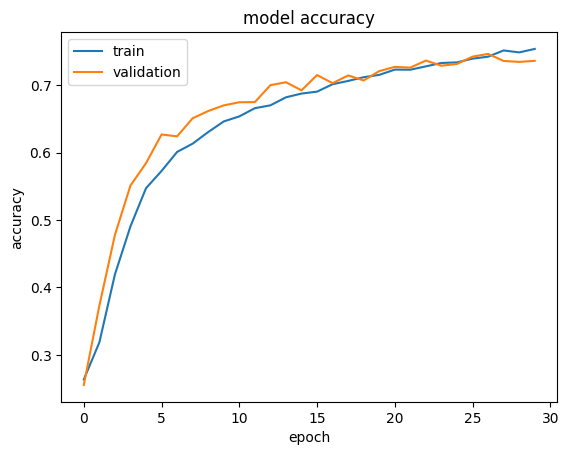

In [39]:
plt.plot(history_2.history["accuracy"])
plt.plot(history_2.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

### **Checking Test Accuracy**


In [40]:
model_2.evaluate(X_test, y_test_encoded)

4/4 [==============================] - 0s 4ms/step - loss: 0.6241 - accuracy: 0.7422


[0.6241133213043213, 0.7421875]

**Observations:**

- By comparing the train and validation accuracy, it seems the model is not overfitting as much. So adding Dropout layers definitely proved beneficial.
- Both the training and validation accuracies are higher than in the previous model, with the final validation accuracy reaching around 77%, compared to approximately 68% previously, indicating that the model has learned to better classify the emotions.


### **Plotting Confusion Matrix**


4/4 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

       happy       0.69      0.78      0.74        32
     neutral       0.77      0.75      0.76        32
         sad       0.58      0.56      0.57        32
    surprise       0.93      0.88      0.90        32

    accuracy                           0.74       128
   macro avg       0.75      0.74      0.74       128
weighted avg       0.75      0.74      0.74       128



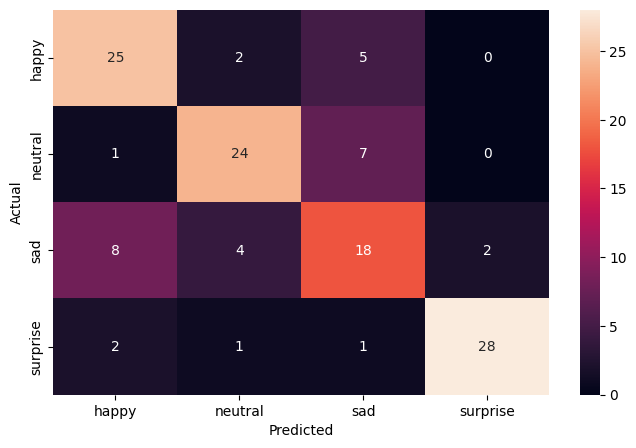

In [41]:
pred = model_2.predict(X_test)
pred = np.argmax(pred, axis=1)

# Convert the pandas DataFrame to a numpy array if it's not already
if isinstance(y_test_encoded, pd.DataFrame):
    y_test_encoded = y_test_encoded.values

# Now we can safely use np.argmax
y_true = np.argmax(y_test_encoded, axis=1)

# Printing the classification report with actual emotion labels
print(classification_report(y_true, pred, target_names=CATEGORIES))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**Observations:**

- The model shows improved metrics for the classes, indicating better sensitivity in identifying this emotion compared to the first model.
- Both models struggle with the 'sad' and 'neutral' classes; however, the second model has shown a slight improvement in correctly predicting those emotions but still has room for improvement.
- The second model shows a higher overall accuracy, 77%, and a better balance between precision and recall, indicating improved generalization and performance across all classes.


### **Prediction**

Let us predict using the best model, i.e., model 2, by plotting four random images from X_test data and see if our best model is predicting the image correctly or not.


1/1 [==============================] - 0s 8ms/step


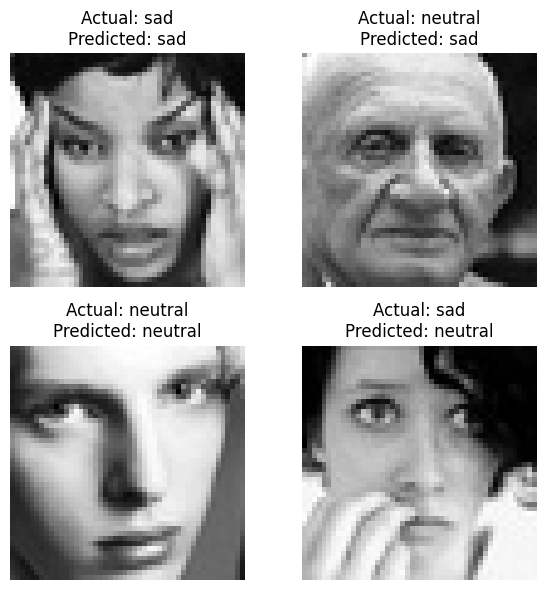

In [42]:
# Set the number of images to display
num_images = 4

# Create a figure with subplots in a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i in range(num_images):
    # Pick a random image from X_test
    random_index = random.randint(0, len(X_test) - 1)
    test_image = X_test[random_index]

    # Predict the emotion of the image using model_2
    predicted_probabilities = model_2.predict(np.expand_dims(test_image, axis=0))
    predicted_label_index = np.argmax(predicted_probabilities)
    predicted_label = CATEGORIES[predicted_label_index]

    # Retrieve the actual label for the image
    actual_label_index = (
        np.argmax(y_test_encoded.values[random_index])
        if isinstance(y_test_encoded, pd.DataFrame)
        else np.argmax(y_test_encoded[random_index])
    )
    actual_label = CATEGORIES[actual_label_index]

    # Plot the image in the corresponding subplot
    ax = axes[i]
    # Assuming X_test is 4D with the last dimension being 1 for grayscale
    ax.imshow(test_image.squeeze(), cmap="gray")
    ax.set_title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
    ax.axis("off")  # Hide the axis

plt.tight_layout()
plt.show()

**Observation:**

- The model is able to correct classify the emotions from happy and surprise, and it is more challenging when it is neutral or sad.


## **Conclusion and Recommendations**


- The second iteration of the CNN model demonstrated better performance compared to the initial model, with improved accuracy and better balance across precision and recall for the different emotion classes, around 77%.

- The models, particularly the second one, showed varying degrees of success with different emotions, with 'surprise' being predicted most accurately and 'neutral' and 'sad' being the most challenging for the model to predict correctly.

- The introduction of dropout layers helped mitigate overfitting, as evidenced by the closer convergence of training and validation accuracies in the second model.

- Recommendations for Further Work:
- Implement data augmentation techniques to increase the diversity of the training data, which could help improve the model's ability to generalize, especially for underperforming classes like 'sad' or 'neutral'.
- Further hyperparameter optimization, including learning rate adjustments, batch size variations, and exploring different model architectures, could lead to improvements in model performance.


In [22]:
random_index = random.randint(0, len(X_test) - 1)
test_image = X_test[random_index]

In [28]:
image = np.expand_dims(test_image, axis=0)

In [45]:
def get_random_image(directory, sub_dirs, categories):
    """
    Returns a random image from the specified directories.

    Parameters:
    - directory (str): The base directory of the dataset.
    - sub_dirs (list of str): Subdirectories to search through (e.g., ['train', 'validation', 'test']).
    - categories (list of str): Categories (e.g., ['happy', 'neutral', 'sad', 'surprise']).

    Returns:
    - Image: A random image from the specified directories.
    """
    image_paths = []
    for sub_dir in sub_dirs:
        for category in categories:
            path = os.path.join(directory, sub_dir, category)
            for img_name in os.listdir(path):
                img_path = os.path.join(path, img_name)
                image_paths.append(img_path)

    if not image_paths:
        raise ValueError("No images found in the specified directories.")

    random_img_path = random.choice(image_paths)
    img = Image.open(random_img_path)

    # Display the image using matplotlib
    plt.imshow(img, cmap="gray")
    plt.axis("off")  # Hide the axis to only show the image
    plt.show()

    return img

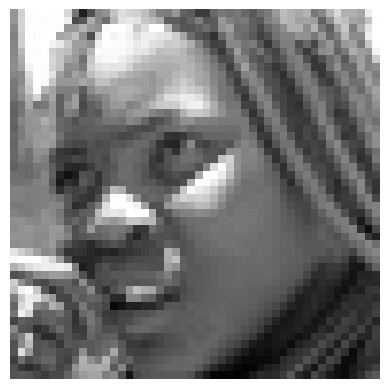

In [46]:
image = get_random_image(DATADIR, SUBDIRS, CATEGORIES)

In [25]:
# Load a pre-trained model
from transformers import AutoProcessor, AutoModelForZeroShotImageClassification

# Specify the checkpoint name or identifier for the pre-trained model you want to use
checkpoint = "openai/clip-vit-large-patch14"

# Initialize the pre-trained model for zero-shot image classification
model = AutoModelForZeroShotImageClassification.from_pretrained(checkpoint)

# Initializes the processor associated with the same pre-trained model
processor = AutoProcessor.from_pretrained(checkpoint)

In [47]:
# Prepare inputs for the zero-shot image classification model
inputs = processor(text=CATEGORIES, images=image, return_tensors="pt", padding=True)

In [48]:
# Import Pytorch
import torch

In [49]:
# Perform inference with the model
with torch.no_grad():
    outputs = model(**inputs)

# Extract Logits and calculate probabilities
logits = outputs.logits_per_image[0]
probs = logits.softmax(dim=-1).numpy()

# Convert probabilities to scores as a list
scores = probs.tolist()

# Create a list of results, sorted by scores in descending order
result = [{"score": score, "label": label} for score, label in zip(scores, CATEGORIES)]
result = sorted(result, key=lambda x: x["score"], reverse=True)


# Display result
result

[{'score': 0.698783278465271, 'label': 'happy'},
 {'score': 0.15240640938282013, 'label': 'surprise'},
 {'score': 0.09336046129465103, 'label': 'neutral'},
 {'score': 0.05544987693428993, 'label': 'sad'}]

In [3]:
import os
import torch
from transformers import AutoProcessor, AutoModelForZeroShotImageClassification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
# Load the pre-trained model and processor
checkpoint = "openai/clip-vit-large-patch14"
model = AutoModelForZeroShotImageClassification.from_pretrained(checkpoint)
processor = AutoProcessor.from_pretrained(checkpoint)


def predict_and_evaluate(directory, sub_dir, categories):
    image_paths = []
    actual_labels = []
    predicted_labels = []
    file_names = []

    # Get all image paths and their actual labels
    path = os.path.join(directory, sub_dir)
    for category in categories:
        category_path = os.path.join(path, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            image_paths.append(img_path)
            actual_labels.append(category)
            file_names.append(img_name)

    # Predict the category for each image
    for img_path, actual_label in zip(image_paths, actual_labels):
        with Image.open(img_path) as img:
            # Prepare inputs for the model
            inputs = processor(text=categories, images=img, return_tensors="pt", padding=True)
            # Perform inference with the model
            with torch.no_grad():
                outputs = model(**inputs)
            # Extract logits and calculate probabilities
            logits = outputs.logits_per_image[0]
            probs = logits.softmax(dim=-1).numpy()
            # Get the highest probability category
            predicted_label = categories[probs.argmax()]
            predicted_labels.append(predicted_label)
            # Print the file name, actual category, and predicted category
            print(f"File: {img_path}, Actual: {actual_label}, Predicted: {predicted_label}")

    # Calculate overall accuracy
    accuracy = accuracy_score(actual_labels, predicted_labels)
    print(f"Overall accuracy: {accuracy}")

    # Print the confusion matrix
    cm = confusion_matrix(actual_labels, predicted_labels, labels=categories)
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=categories, yticklabels=categories)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

File: /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/Facial_emotion_images/test/happy/15803.jpg, Actual: happy, Predicted: neutral
File: /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/Facial_emotion_images/test/happy/15707.jpg, Actual: happy, Predicted: happy
File: /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/Facial_emotion_images/test/happy/15810.jpg, Actual: happy, Predicted: happy
File: /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/Facial_emotion_images/test/happy/15776.jpg, Actual: happy, Predicted: happy
File: /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/Facial_emotion_images/test/happy/15822.jpg, Actual: happy, Predicted: neutral
File: /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/Facial_emotion_images/test/happy/15728.jpg, Actual: happy, Predicted: happy
File: /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/Facial_emotion_images/test/happy/157

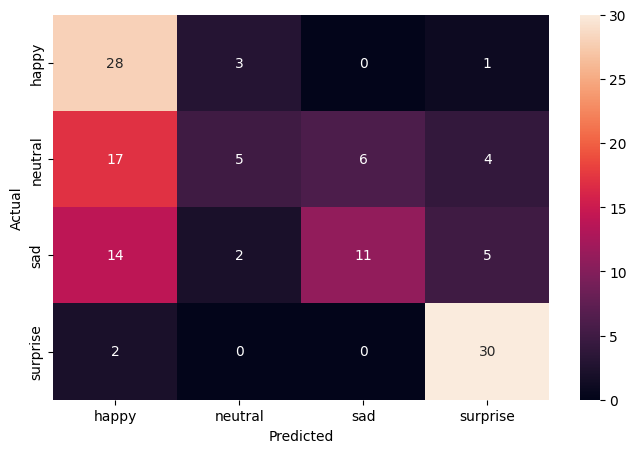

In [5]:
# Example usage:
predict_and_evaluate(DATADIR, "test", CATEGORIES)